In [94]:
# run this cell to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=b1755dbd8713003ba9be7b67fc69f7ef0c3f3770f9d2e54de9927871ce1a431a
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("GitHub CSV Analysis") \
    .getOrCreate()


In [97]:
csv_url = "Twitter-Sentiment-Analysis_main_Canadian_elections_2019.csv"
twitter_csv_url = "/content/drive/MyDrive/Projects/ALY6110 - Twitter Sentiment Analysis/Datasets/Twitter-Sentiment-Analysis_main_Canadian_elections_2019.csv"
sentiment_csv_url = "/content/drive/MyDrive/Projects/ALY6110 - Twitter Sentiment Analysis/Datasets/Sentiment-Analysis_main_sentiment_analysis.csv"
df = spark.read.csv(twitter_csv_url, header=True, inferSchema=True)


In [96]:
df.show(5)
count = df.count()
print("Number of rows:", count)

+---------+--------------------+--------------------+
|sentiment|     negative_reason|                text|
+---------+--------------------+--------------------+
| negative|Women Reproductiv...|"b""@RosieBarton ...|
| positive|                null|"b""#AllWomanSpac...|
| negative|             Economy|"b""#Brantford It...|
| positive|                null|"b""#Canada #Cana...|
| negative|             Economy|"b""#Canada #taxp...|
+---------+--------------------+--------------------+
only showing top 5 rows

Number of rows: 2133


In [ ]:
df.describe().show()

+-------+---------+--------------------+--------------------+
|summary|sentiment|     negative_reason|                text|
+-------+---------+--------------------+--------------------+
|  count|     2133|                1007|                2133|
|   mean|     null|                null|                null|
| stddev|     null|                null|                null|
|    min| negative|     Climate Problem|"b""#AllWomanSpac...|
|    max| positive|Women Reproductiv...|b'wow @TheRealKee...|
+-------+---------+--------------------+--------------------+



In [ ]:
df.groupBy("sentiment").count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
| positive| 1127|
| negative| 1006|
+---------+-----+



In [ ]:
from pyspark.sql.functions import col

sentiment_counts = df.groupBy("sentiment").count()
total_count = df.count()

sentiment_counts.withColumn("percentage", (col("count") / total_count * 100)).show()

+---------+-----+------------------+
|sentiment|count|        percentage|
+---------+-----+------------------+
| positive| 1127| 52.83638068448195|
| negative| 1006|47.163619315518055|
+---------+-----+------------------+



In [ ]:
filtered_df = df.filter(df["sentiment"] == "positive")
filtered_df.show()

+---------+---------------+--------------------+
|sentiment|negative_reason|                text|
+---------+---------------+--------------------+
| positive|           null|"b""#AllWomanSpac...|
| positive|           null|"b""#Canada #Cana...|
| positive|           null|"b""#CDNmedia #el...|
| positive|           null|"b""#cdnpoli #elx...|
| positive|           null|"b""#Elxn43 is tw...|
| positive|           null|"b""#ELXN43 PREDI...|
| positive|           null|"b""#ICYMI - #Ana...|
| positive|           null|"b""#ICYMI - #Ana...|
| positive|           null|"b""#ThreadAlert ...|
| positive|           null|"b""#UpRiSingh I'...|
| positive|           null|"b""#UpToYouth #C...|
| positive|           null|"b"".@YorkUHealth...|
| positive|           null|"b""@222Minutes S...|
| positive|           null|"b""@alanthomasdo...|
| positive|           null|"b""@althiaraj @J...|
| positive|           null|"b""@amandaalvaro...|
| positive|           null|"b""@AndrewScheer...|
| positive|         

In [ ]:
from pyspark.sql.functions import length, avg

df.withColumn("text_length", length("text")).select(avg("text_length")).show()

+------------------+
|  avg(text_length)|
+------------------+
|188.07969995311768|
+------------------+



In [ ]:
df.filter(df["sentiment"] == "negative").groupBy("negative_reason").count().orderBy(col("count").desc()).show()


+--------------------+-----+
|     negative_reason|count|
+--------------------+-----+
|              Others|  364|
|             Scandal|  270|
|           Tell lies|  198|
|             Economy|   51|
|Women Reproductiv...|   45|
|     Climate Problem|   41|
|          Separation|   16|
|           Privilege|   12|
|          Healthcare|    5|
|Healthcare and Ma...|    4|
+--------------------+-----+



In [ ]:
from pyspark.sql.functions import split, explode

word_counts = df.select(explode(split("text", " ")).alias("word")).groupBy("word").count().orderBy(col("count").desc())
word_counts.show()

+--------+-----+
|    word|count|
+--------+-----+
|     the| 1627|
|      to| 1310|
| #elxn43| 1124|
|       a|  821|
|     and|  774|
|      of|  774|
|      is|  683|
|      in|  672|
|#cdnpoli|  638|
|     for|  615|
|        |  531|
|      on|  383|
|     you|  337|
|    that|  324|
|    this|  298|
|     are|  278|
|       I|  256|
|    with|  236|
|#elxn43'|  233|
|      be|  223|
+--------+-----+
only showing top 20 rows



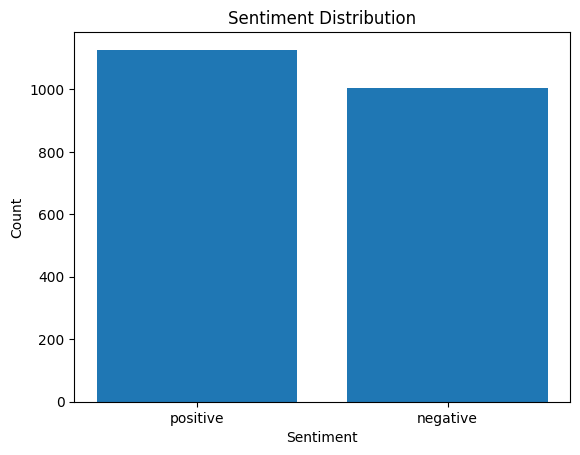

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupBy("sentiment").count().toPandas()

plt.bar(sentiment_counts["sentiment"], sentiment_counts["count"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

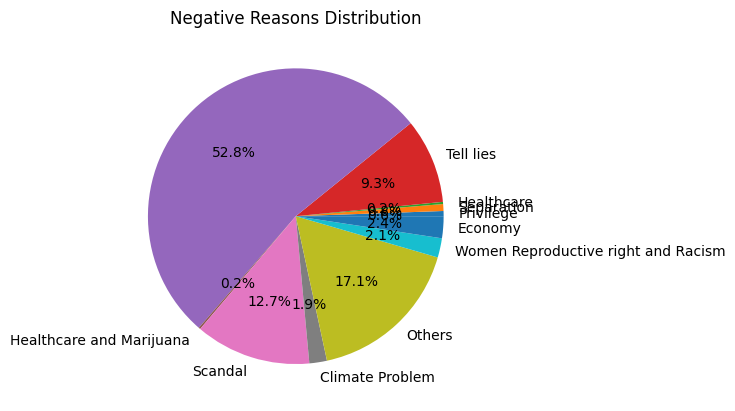

In [ ]:
negative_reason_counts = df.groupBy("negative_reason").count().toPandas()

plt.pie(negative_reason_counts["count"], labels=negative_reason_counts["negative_reason"], autopct="%1.1f%%")
plt.title("Negative Reasons Distribution")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def visualize_negative_reasons(df):
    negative_reason_counts = df.groupBy("negative_reason").count().toPandas()

    plt.pie(negative_reason_counts["count"], labels=negative_reason_counts["negative_reason"], autopct="%1.1f%%")
    plt.title("Negative Reasons Distribution")
    plt.show()

visualize_negative_reasons(df)


NameError: ignored

In [ ]:
from pyspark.sql.functions import desc

# Add a 'Party' column to the DataFrame based on your criteria
df_with_party = df.withColumn("Party", ...)

# Group by party, negative_reason, count occurrences, and order by count in descending order
party_negative_reasons = df_with_party.filter(df_with_party["sentiment"] == "negative") \
    .groupBy("Party", "negative_reason") \
    .count() \
    .orderBy(desc("count"))

# Group by party, sentiment, count occurrences, and order by count in descending order
party_negative_sentiments = df_with_party.filter(df_with_party["sentiment"] == "negative") \
    .groupBy("Party", "sentiment") \
    .count() \
    .orderBy(desc("count"))

# Collect the top 10 negative reasons and sentiments for each party, including the party being spoken about
party_negative_reasons_top_10 = party_negative_reasons.groupBy("Party") \
    .agg({"count": "sum"}) \
    .withColumnRenamed("sum(count)", "total_count") \
    .join(party_negative_reasons, "Party") \
    .filter(party_negative_reasons["count"] > 0) \
    .orderBy("Party", desc("count")) \
    .groupBy("Party") \
    .agg(party_negative_reasons["negative_reason"].alias("top_negative_reasons")) \
    .limit(10)

party_negative_sentiments_top_10 = party_negative_sentiments.groupBy("Party") \
    .agg({"count": "sum"}) \
    .withColumnRenamed("sum(count)", "total_count") \
    .join(party_negative_sentiments, "Party") \
    .filter(party_negative_sentiments["count"] > 0) \
    .orderBy("Party", desc("count")) \
    .groupBy("Party") \
    .agg(party_negative_sentiments["sentiment"].alias("top_negative_sentiments")) \
    .limit(10)

# Display the results
party_negative_reasons_top_10.show()
party_negative_sentiments_top_10.show()


PySparkTypeError: ignored

In [ ]:
df.show(50)

+---------+--------------------+--------------------+
|sentiment|     negative_reason|                text|
+---------+--------------------+--------------------+
| negative|Women Reproductiv...|"b""@RosieBarton ...|
| positive|                null|"b""#AllWomanSpac...|
| negative|             Economy|"b""#Brantford It...|
| positive|                null|"b""#Canada #Cana...|
| negative|             Economy|"b""#Canada #taxp...|
| negative|              Others|"b""#CanadaVotes2...|
| positive|                null|"b""#CDNmedia #el...|
| positive|                null|"b""#cdnpoli #elx...|
| negative|              Others|"b""#chooseforwar...|
| negative|             Scandal|"b""#CPCKinsellaG...|
| positive|                null|"b""#Elxn43 is tw...|
| positive|                null|"b""#ELXN43 PREDI...|
| positive|                null|"b""#ICYMI - #Ana...|
| positive|                null|"b""#ICYMI - #Ana...|
| negative|              Others|"b""#Kinsella run...|
| negative|           Tell l

In [ ]:
import numpy as np
import pandas as pd
import re
import html
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

import gensim
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_word = stopwords.words('english')

def clean_election (text):

    new_text = re.sub(r'<...>',' ', text)  # remove html tags <...>
    new_text = html.unescape(new_text) # replace html character with ASCII
    new_text = re.sub(r'http\S+', ' ', new_text) # removed all URLs

    new_text = new_text.lower() # convert all characters to lowercase.
    new_text = re.sub(r'(\\x(.){2})', ' ',new_text) # remove UTF-8 code like \\xe2

    new_text = new_text.replace('b"',' ') # remove b"
    new_text = new_text.replace("b'",' ') # remove b'
    new_text = new_text.replace('\\n',' ') # remove \\n

    # stem words & remove stop words
    tokenizer = RegexpTokenizer(r'\w+')
    new_text = remove_stopwords(new_text)
    words = tokenizer.tokenize(new_text)
    words_list = [word for word in words if not word in stop_word]
    words_list = [PorterStemmer().stem(word) for word in words_list]
    new_text = ' '.join(words_list)

    new_text = re.sub(r' \d+', ' ', new_text) # remove numbers after space
    new_text = " ".join(new_text.split()) # remove leading & trailing space, elimiated spaces to single space

    return new_text


def clean_sentiment (text):

    new_text = re.sub(r'<...>',' ', text)  # remove html tags <...>
    new_text = html.unescape(new_text) # replace html character with ASCII
    new_text = re.sub(r'http\S+', ' ', new_text) # removed all URLs
    new_text = re.sub(r"@[^\s]+", "", new_text) # remove @usernames

    new_text = new_text.lower() # convert all characters to lowercase.
    new_text = re.sub(r'(\\x(.){2})', ' ',new_text) # remove UTF-8 code like \\xe2
    new_text = new_text.replace('rt',' ') # remove rt
    new_text = new_text.replace('\\n',' ') # remove \\n

    # stem words & remove stop words
    tokenizer = RegexpTokenizer(r'\w+')
    new_text = remove_stopwords(new_text)
    words = tokenizer.tokenize(new_text)
    words_list = [word for word in words if not word in stop_word]
    words_list = [PorterStemmer().stem(word) for word in words_list]
    new_text = ' '.join(words_list)

    new_text = re.sub(r' \d+', ' ', new_text) # remove numbers after space
    new_text = " ".join(new_text.split()) # remove leading & trailing space, elimiated spaces to single space

    return new_text


def count_words(df):
    # counts words frequency in text
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()

    for i in range (df.shape[0]):
        new_text = df.iloc[i]['new_text']
        words = tokenizer.tokenize(new_text)
        word_counter.update(words)

    return word_counter

In [ ]:
# Import file
raw_elections=pd.read_csv(twitter_csv_url)
print (raw_elections.shape,'\n')
print(raw_elections.isnull().sum())

# Lower column 'text'
raw_elections['text'] = raw_elections.text.str.lower()

# Add new column 'new_text' by cleaning column 'text'
raw_elections['new_text']=raw_elections['text'].apply(clean_election)

# Add column 'label' (assign negative to 0, positive to 1)
raw_elections['label']=[1 if (feature['sentiment']=='positive') else 0 for index,feature in raw_elections.iterrows()]
raw_elections = raw_elections.drop(['sentiment'], axis=1)
raw_elections.head()

(2133, 3) 

sentiment             0
negative_reason    1126
text                  0
dtype: int64


,negative_reason,text,new_text,label
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0
1,NaN,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0
3,NaN,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0


In [ ]:
# visualize 100 words with highest frequency in 'new_text'
elections_cnt = count_words(raw_elections)
elections_cnt = [(word,freq) for (word, freq) in elections_cnt.most_common(100)]
print (elections_cnt)

[('elxn43', 2120), ('cdnpoli', 1158), ('vote', 397), ('elect', 266), ('canada', 253), ('parti', 228), ('scheer', 226), ('trudeau', 200), ('andrewsch', 198), ('conserv', 198), ('canadian', 175), ('liber', 171), ('chooseforward', 164), ('ndp', 163), ('cpc', 157), ('like', 153), ('peopl', 152), ('campaign', 147), ('day', 138), ('monday', 136), ('justintrudeau', 135), ('need', 130), ('support', 130), ('time', 122), ('lie', 117), ('know', 115), ('kinsella', 114), ('candid', 111), ('polit', 110), ('right', 105), ('want', 104), ('cpc_hq', 99), ('work', 98), ('help', 94), ('hire', 87), ('think', 85), ('govern', 83), ('leader', 82), ('question', 80), ('answer', 76), ('let', 75), ('trudeaumustgo', 75), ('chang', 75), ('voter', 73), ('ppc', 72), ('countri', 71), ('endors', 70), ('cdnelxn2019', 69), ('thejagmeetsingh', 69), ('go', 68), ('year', 68), ('elxn2019', 68), ('good', 67), ('today', 66), ('climat', 65), ('andrew', 65), ('look', 64), ('green', 64), ('kinsellag', 63), ('ask', 59), ('win', 59

In [ ]:
# Import file
raw_sentiment = pd.read_csv(sentiment_csv_url)
print ('Original data shape:', raw_sentiment.shape)

# sample 40% data, ratio of positive and negative sentiment unchange
# raw_sentiment = raw_sentiment.groupby(['label']).apply(lambda x: x.sample(frac=0.4,random_state=66))

# # shuffle data
# raw_sentiment = raw_sentiment.sample(frac=1)
# raw_sentiment = raw_sentiment.reset_index(drop=True)
# print ('Sampled data shape:', raw_sentiment.shape,'\n')

Original data shape: (186138, 3)


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re

In [ ]:
import re
import html
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_word = set(stopwords.words("english"))

def clean_sentiment(text):
    if isinstance(text, str):
        new_text = re.sub(r'<.*?>', ' ', text)  # remove html tags <...>
        new_text = html.unescape(new_text)  # replace html character with ASCII
        new_text = re.sub(r'http\S+', ' ', new_text)  # remove all URLs
        new_text = re.sub(r"@[^\s]+", "", new_text)  # remove @usernames

        new_text = new_text.lower()  # convert all characters to lowercase.
        new_text = re.sub(r'(\\x(.){2})', ' ', new_text)  # remove UTF-8 code like \\xe2
        new_text = new_text.replace('rt', ' ')  # remove rt
        new_text = new_text.replace('\\n', ' ')  # remove \\n

        # stem words & remove stop words
        tokenizer = RegexpTokenizer(r'\w+')
        words = tokenizer.tokenize(new_text)
        words_list = [word for word in words if word not in stop_word]
        words_list = [PorterStemmer().stem(word) for word in words_list]
        new_text = ' '.join(words_list)

        new_text = re.sub(r'\d+', ' ', new_text)  # remove numbers
        new_text = " ".join(new_text.split())  # remove leading & trailing spaces, eliminate multiple spaces

        return new_text
    else:
        return None

# Clean the 'text' column in the pandas DataFrame
raw_sentiment['new_text'] = raw_sentiment['text'].apply(clean_sentiment)

# Show the updated DataFrame
raw_sentiment.head()


,ID,text,label,new_text
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1.0,josh jenkin look forward tab breeder crown sup...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1.0,congratul pakistan becom no testteam world odd...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1.0,septemb take main mendoza surpris thanksgiv pa...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1.0,newli paint wall thank million custodi painter...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1.0,excit announc juli feschott lab reloc mbg


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

def count_words(df):
    all_words = []
    for text in df['new_text']:
        if isinstance(text, str):
            words = word_tokenize(text)
            all_words.extend(words)
    freq_dist = FreqDist(all_words)
    return freq_dist

# Visualize 100 words with the highest frequency in 'new_text'
sentiment_cnt = count_words(raw_sentiment)
sentiment_cnt = [(word, freq) for word, freq in sentiment_cnt.most_common(100)]
print(sentiment_cnt)


[('love', 25558), ('happi', 21237), ('thank', 13949), ('good', 13283), ('great', 12342), ('day', 11248), ('best', 10656), ('bi', 9439), ('hday', 9225), ('amaz', 8936), ('beauti', 7811), ('look', 7745), ('one', 6871), ('get', 6264), ('today', 5898), ('make', 5796), ('like', 5749), ('much', 5511), ('found', 5376), ('new', 5240), ('see', 5225), ('win', 5138), ('time', 5064), ('fun', 5047), ('u', 4892), ('year', 4569), ('snail', 4489), ('transpond', 4480), ('trecru', 4477), ('us', 4123), ('follow', 4082), ('friend', 3914), ('go', 3883), ('life', 3514), ('hope', 3506), ('enjoy', 3451), ('come', 3406), ('sea', 3340), ('peopl', 3258), ('ever', 3216), ('excit', 3175), ('giant', 3147), ('monster', 3127), ('work', 3112), ('encount', 3068), ('guy', 3029), ('night', 2997), ('cute', 2973), ('miss', 2938), ('got', 2927), ('thing', 2896), ('realli', 2883), ('wait', 2857), ('nice', 2768), ('suppo', 2766), ('alway', 2764), ('proud', 2720), ('know', 2669), ('girl', 2665), ('sta', 2663), ('back', 2622), 

Determines the political party of all the tweets in the Canadian Elections dataset. Look at relevant words and hashtags (ideology,
leader,slogan,color) that identify to certain political parties or candidates.  



* ✓ Liberal: 'Liberalism, social liberalism', 'Justin Trudeau','Choose forward','red'
* ✓ Conservatives: 'Conservatism', 'economic liberalism', 'Andrew Scheer','It's time for you to get ahead', 'blue'
* ✓ New Democratic Party (NDC): 'Social democracy', 'Jagmeet Singh', 'In it for you','orange'
* ✓ Liberal & Conservatives (contain keys words of Liberal and Conservatives)
* ✓ Liberal & NDC
* ✓ Conservatives & NDC
* ✓ All (contain keys words of all three parties)
* ✓ Other (other parties)

In [ ]:
key_liberal = ['justin','trudeau','chooseforward','lpc','liberal','liberalism','get ahead','getahead','red']
key_conservative = ['andrew', 'scheer','cpc','conservatism','blue']
key_NDP = ['jagmeet','singh','ndp','democracy','initforyou','orange']

# Add column 'party': determine the political party of given text
raw_elections['party'] = np.nan

for i in range(raw_elections.shape[0]):
    text = raw_elections.text[i]

    if any(word in text for word in key_liberal) and any(word in text for word in key_conservative) and any(word in text for word in key_NDP):
        raw_elections['party'][i] = 'all'

    elif any(word in text for word in key_liberal) and any(word in text for word in key_conservative):
        raw_elections['party'][i] = 'liberal & conservative'

    elif any(word in text for word in key_liberal) and any(word in text for word in key_NDP):
        raw_elections['party'][i] = 'liberal & NDP'

    elif any(word in text for word in key_conservative) and any(word in text for word in key_NDP):
        raw_elections['party'][i] = 'conservative & NDP'

    elif any(word in text for word in key_liberal):
        raw_elections['party'][i] = 'liberal'
    elif any(word in text for word in key_conservative):
        raw_elections['party'][i] = 'conservative'
    elif any(word in text for word in key_NDP):
        raw_elections['party'][i] = 'NDP'
    else:
        raw_elections['party'][i] = 'other'

raw_elections.head()

,negative_reason,text,new_text,label,party
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0,conservative
1,NaN,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1,other
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0,liberal
3,NaN,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1,other
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0,liberal


In [ ]:
from textblob import TextBlob

# Group the DataFrame by 'party' column and aggregate the 'new_text' column
grouped_df = raw_elections.groupby('party')['new_text'].apply(lambda x: ' '.join(x))

# Calculate the sentiment scores for each party
sentiment_scores = grouped_df.apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new DataFrame to store the party and sentiment scores
result_df = pd.DataFrame({'party': sentiment_scores.index, 'sentiment_score': sentiment_scores})

# Reset the index to make 'party' a column again
result_df = result_df.reset_index(drop=True)

# Sort the DataFrame by 'party' and 'sentiment_score' in descending order
sorted_df = result_df.sort_values(by=['party', 'sentiment_score'], ascending=[True, False])

# Extract the top 10 positive and negative sentiments for each party
top_10_positive = sorted_df.groupby('party').head(10)
top_10_negative = sorted_df.groupby('party').tail(10)

# Print the top 10 positive sentiments for each party
print("Top 10 Positive Sentiments for Each Party:")
print(top_10_positive)

# Print the top 10 negative sentiments for each party
print("Top 10 Negative Sentiments for Each Party:")
print(top_10_negative)


Top 10 Positive Sentiments for Each Party:
                    party  sentiment_score
0                     NDP         0.144334
1                     all         0.106809
2            conservative         0.164567
3      conservative & NDP         0.126357
4                 liberal         0.211753
5           liberal & NDP         0.142445
6  liberal & conservative         0.097934
7                   other         0.232448
Top 10 Negative Sentiments for Each Party:
                    party  sentiment_score
0                     NDP         0.144334
1                     all         0.106809
2            conservative         0.164567
3      conservative & NDP         0.126357
4                 liberal         0.211753
5           liberal & NDP         0.142445
6  liberal & conservative         0.097934
7                   other         0.232448


In [ ]:
from collections import Counter

# Convert 'negative_reason' column to string values
raw_elections['negative_reason'] = raw_elections['negative_reason'].astype(str)

# Group the DataFrame by 'party' and aggregate the 'negative_reason' column
grouped_negative_reason = raw_elections.groupby('party')['negative_reason'].apply(lambda x: ' '.join(x))

# Count the occurrences of negative reasons for each party
negative_reason_counts = grouped_negative_reason.apply(lambda x: Counter(x.split()).most_common())

# Group the DataFrame by 'party' and aggregate the 'new_text' column
grouped_new_text = raw_elections.groupby('party')['new_text'].apply(lambda x: ' '.join(x))

# Calculate the sentiment scores for each party
sentiment_scores = grouped_new_text.apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new DataFrame to store the party and sentiment scores
result_df = pd.DataFrame({'party': sentiment_scores.index, 'sentiment_score': sentiment_scores})

# Reset the index to make 'party' a column again
result_df = result_df.reset_index(drop=True)

# Sort the DataFrame by 'party' and 'sentiment_score' in descending order
sorted_df = result_df.sort_values(by=['party', 'sentiment_score'], ascending=[True, False])

# Group the DataFrame by 'party' and extract the top 10 positive sentiments for each party
top_10_positive = sorted_df.groupby('party').head(10)

# Print the top 10 positive sentiments for each party
print("Top 10 Positive Sentiments for Each Party:")
print(top_10_positive)

# Print the negative reasons for each party
for party, reasons in negative_reason_counts.items():
    print("Negative Reasons for", party)
    for reason, count in reasons:
        print(reason, ":", count)


Top 10 Positive Sentiments for Each Party:
                    party  sentiment_score
0                     NDP         0.144334
1                     all         0.106809
2            conservative         0.164567
3      conservative & NDP         0.126357
4                 liberal         0.211753
5           liberal & NDP         0.142445
6  liberal & conservative         0.097934
7                   other         0.232448
Negative Reasons for NDP
nan : 102
Others : 16
Tell : 12
lies : 12
Scandal : 9
Healthcare : 2
Privilege : 2
Women : 2
Reproductive : 2
right : 2
and : 2
Racism : 2
Economy : 2
Negative Reasons for all
nan : 22
Tell : 12
lies : 12
Others : 7
Economy : 3
Scandal : 3
Women : 1
Reproductive : 1
right : 1
and : 1
Racism : 1
Privilege : 1
Negative Reasons for conservative
nan : 108
Scandal : 75
Others : 69
Tell : 61
lies : 61
Women : 10
Reproductive : 10
right : 10
and : 10
Racism : 10
Economy : 6
Climate : 4
Problem : 4
Privilege : 2
Negative Reasons for conservative &

In [ ]:
from collections import Counter

# Convert 'negative_reason' column to string values
raw_elections['negative_reason'] = raw_elections['negative_reason'].astype(str)

# Group the DataFrame by 'party' and aggregate the 'negative_reason' column
grouped_negative_reason = raw_elections.groupby('party')['negative_reason'].apply(lambda x: ' '.join(x))

# Count the occurrences of negative reasons for each party
negative_reason_counts = grouped_negative_reason.apply(lambda x: Counter(x.split()).most_common())

# Group the DataFrame by 'party' and aggregate the 'new_text' column
grouped_new_text = raw_elections.groupby('party')['new_text'].apply(lambda x: ' '.join(x))

# Calculate the sentiment scores for each party
sentiment_scores = grouped_new_text.apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new DataFrame to store the party and sentiment scores
result_df = pd.DataFrame({'party': sentiment_scores.index, 'sentiment_score': sentiment_scores})

# Reset the index to make 'party' a column again
result_df = result_df.reset_index(drop=True)

# Sort the DataFrame by 'party' and 'sentiment_score' in descending order
sorted_df = result_df.sort_values(by=['party', 'sentiment_score'], ascending=[True, False])

# Group the DataFrame by 'party' and extract the top 10 positive and negative sentiments for each party
top_10_positive = sorted_df.groupby('party').head(10)

# Print the top 10 positive sentiments for each party
print("Top 10 Positive Sentiments for Each Party:")
print(top_10_positive)

# Filter out rows with NaN values in 'negative_reason' column
filtered_negative_reason = raw_elections.dropna(subset=['negative_reason'])

# Group the DataFrame by 'party' and aggregate the 'negative_reason' column
grouped_positive_reason = filtered_negative_reason.groupby('party')['negative_reason'].apply(lambda x: ' '.join(x))

# Count the occurrences of positive reasons for each party
positive_reason_counts = grouped_positive_reason.apply(lambda x: Counter(x.split()).most_common())

# Print the positive reasons for each party
for party, reasons in positive_reason_counts.items():
    print("Positive Reasons for", party)
    for reason, count in reasons:
        print(reason, ":", count)


Top 10 Positive Sentiments for Each Party:
                    party  sentiment_score
0                     NDP         0.144334
1                     all         0.106809
2            conservative         0.164567
3      conservative & NDP         0.126357
4                 liberal         0.211753
5           liberal & NDP         0.142445
6  liberal & conservative         0.097934
7                   other         0.232448
Positive Reasons for NDP
nan : 102
Others : 16
Tell : 12
lies : 12
Scandal : 9
Healthcare : 2
Privilege : 2
Women : 2
Reproductive : 2
right : 2
and : 2
Racism : 2
Economy : 2
Positive Reasons for all
nan : 22
Tell : 12
lies : 12
Others : 7
Economy : 3
Scandal : 3
Women : 1
Reproductive : 1
right : 1
and : 1
Racism : 1
Privilege : 1
Positive Reasons for conservative
nan : 108
Scandal : 75
Others : 69
Tell : 61
lies : 61
Women : 10
Reproductive : 10
right : 10
and : 10
Racism : 10
Economy : 6
Climate : 4
Problem : 4
Privilege : 2
Positive Reasons for conservative &

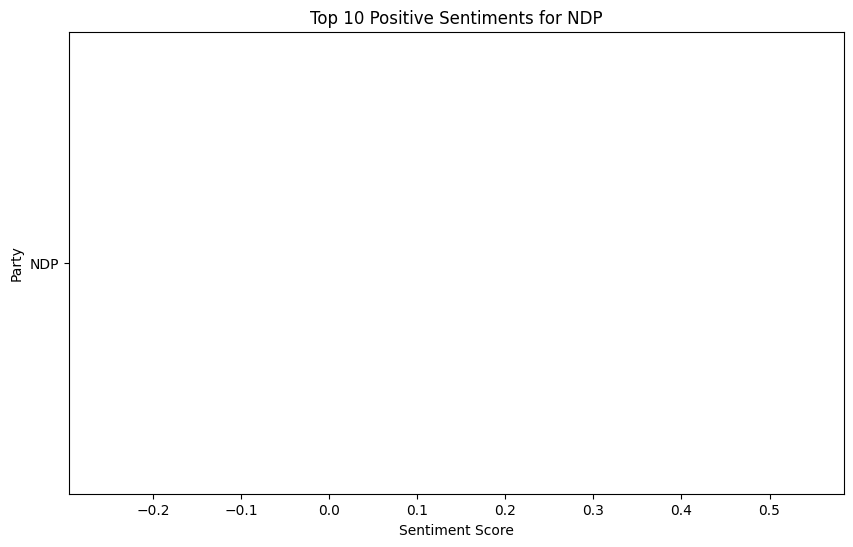

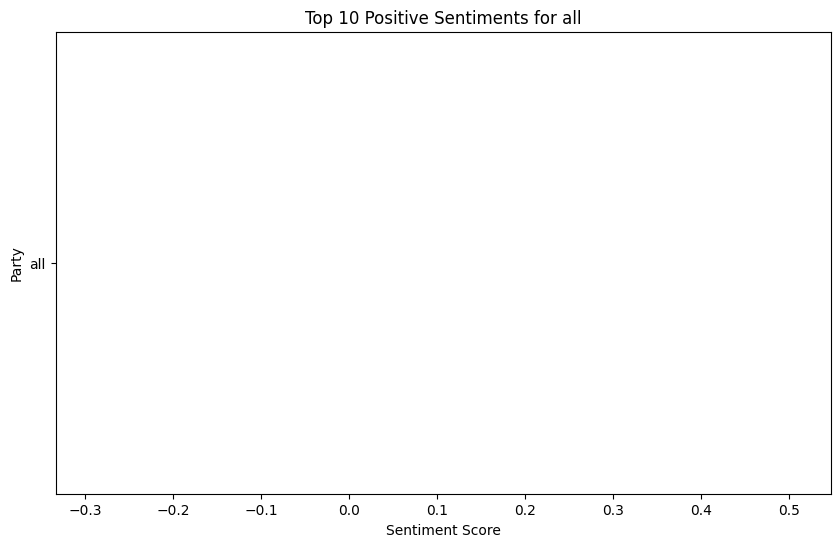

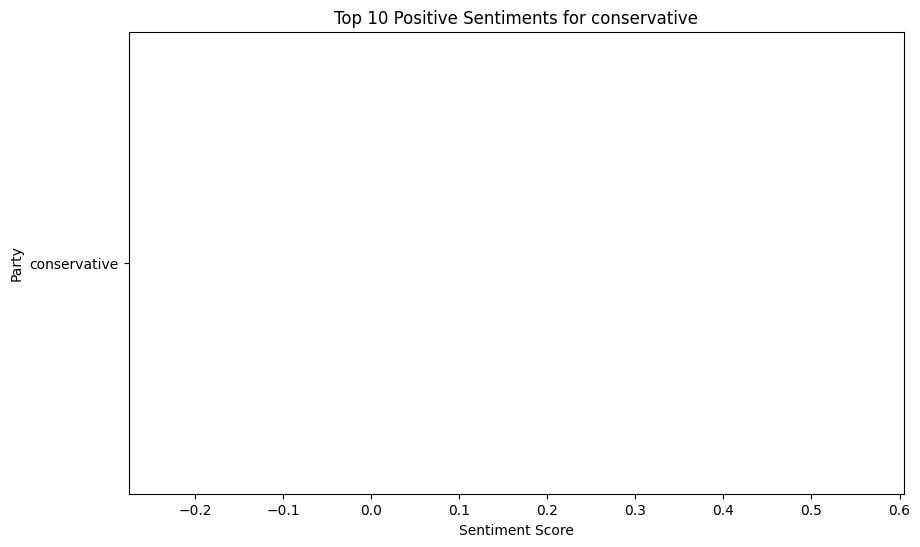

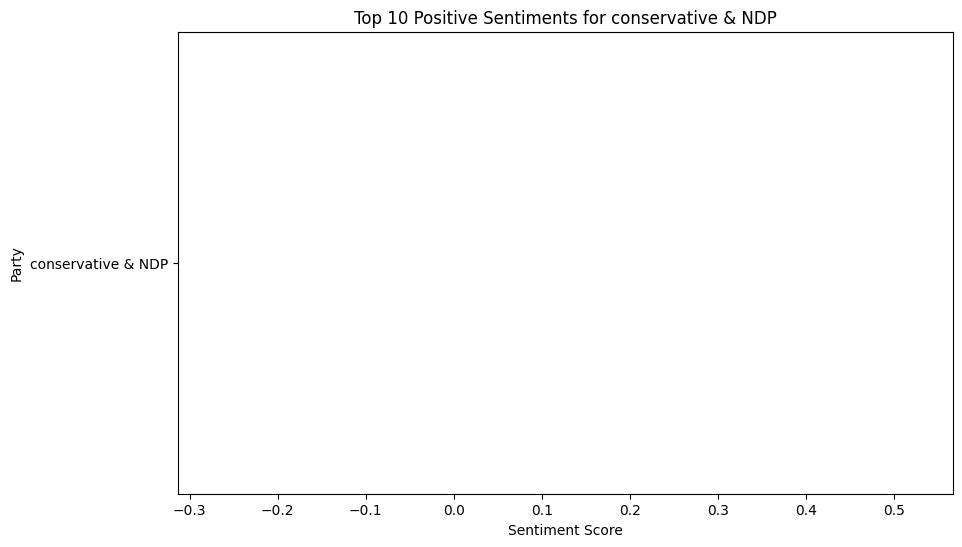

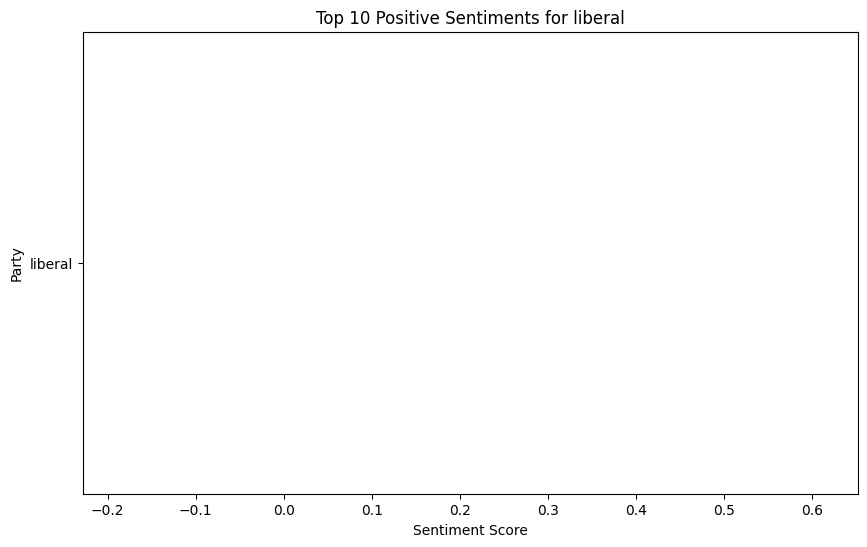

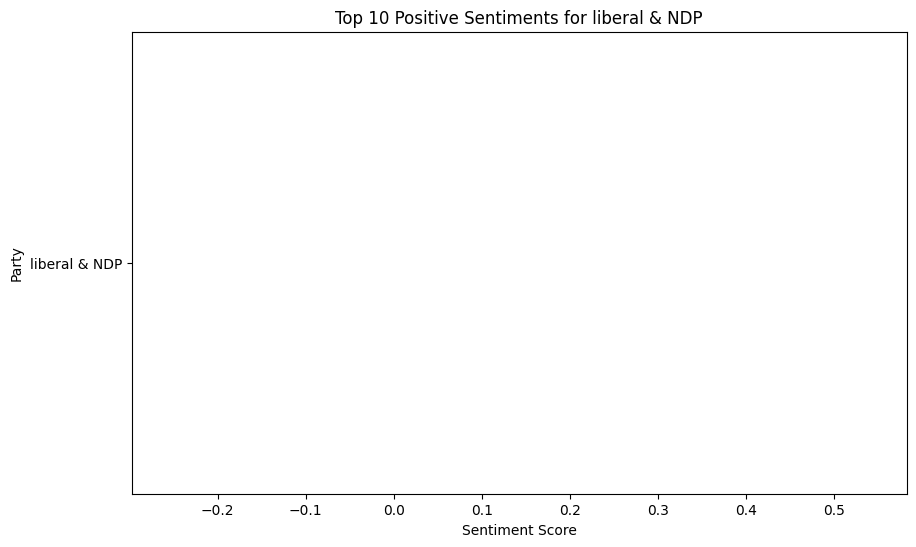

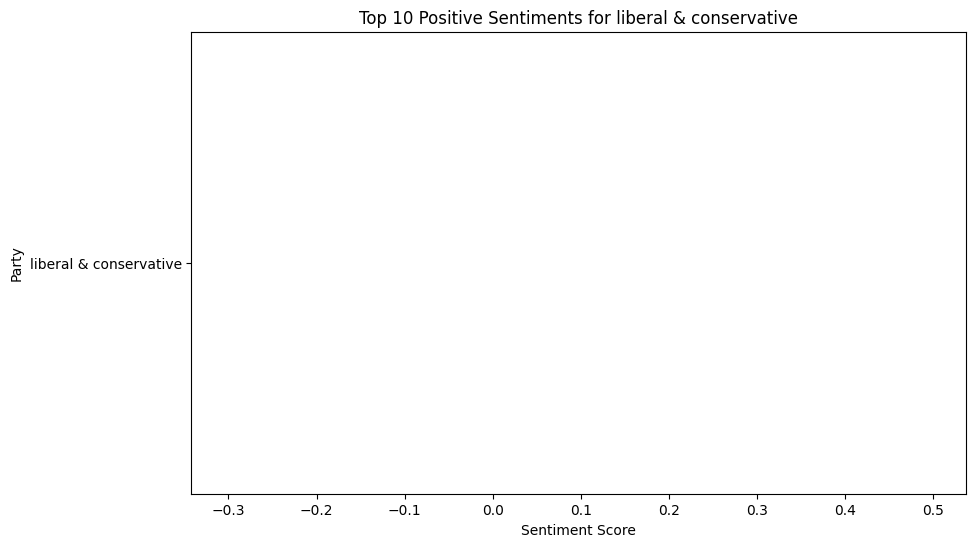

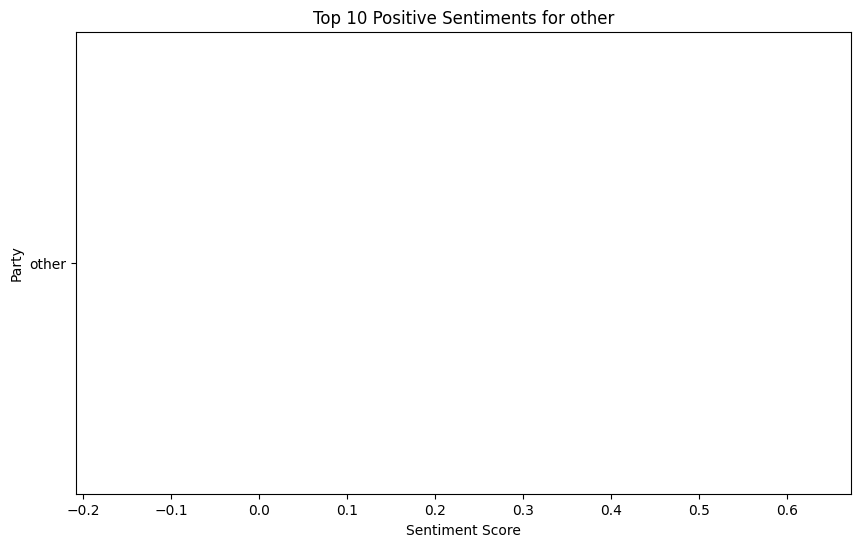

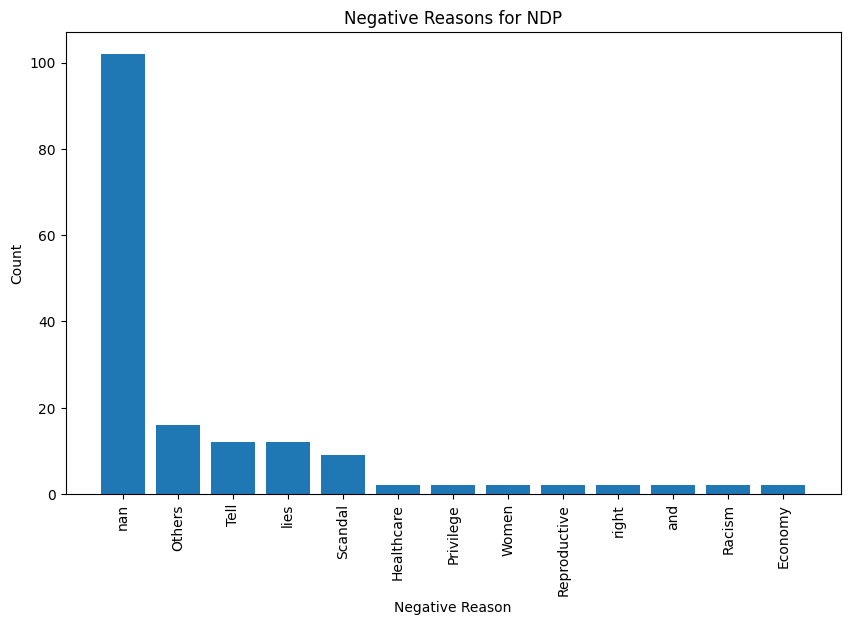

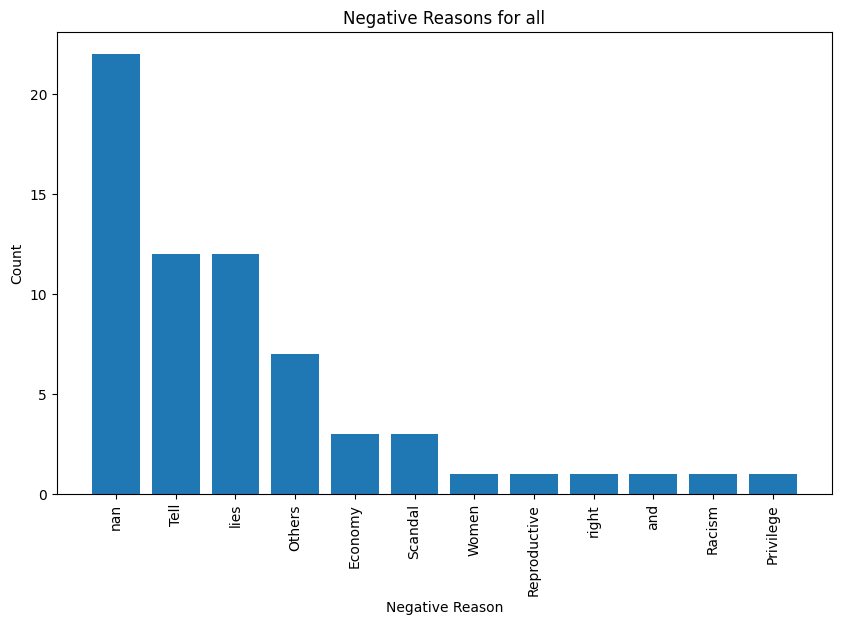

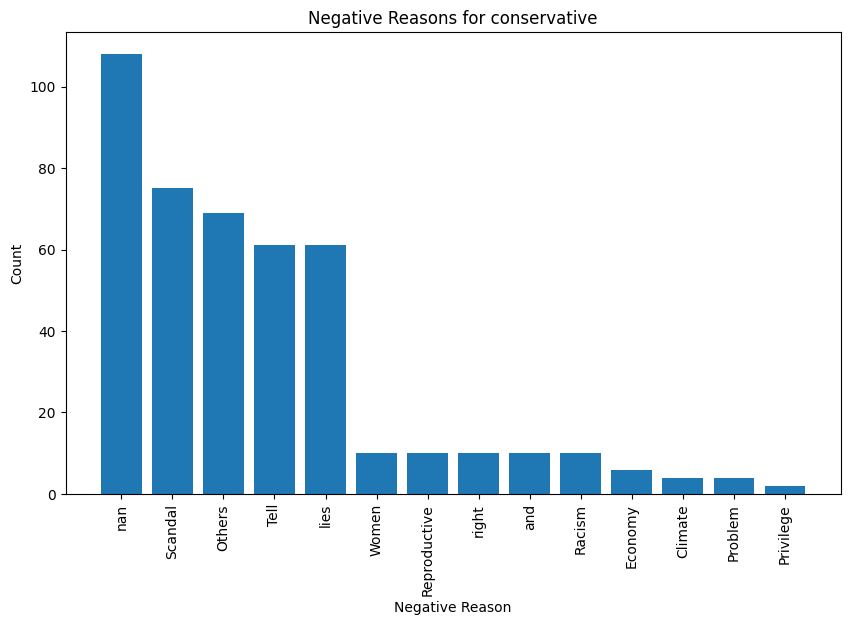

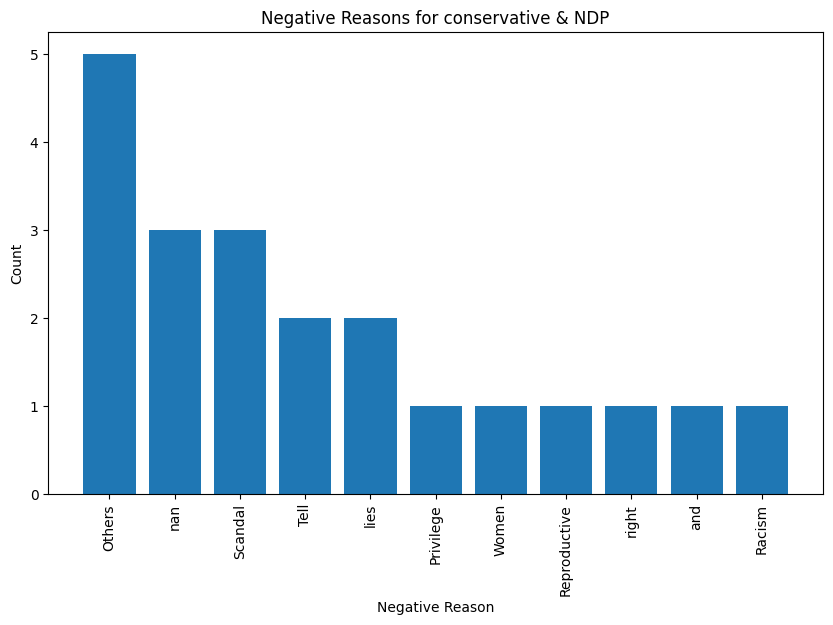

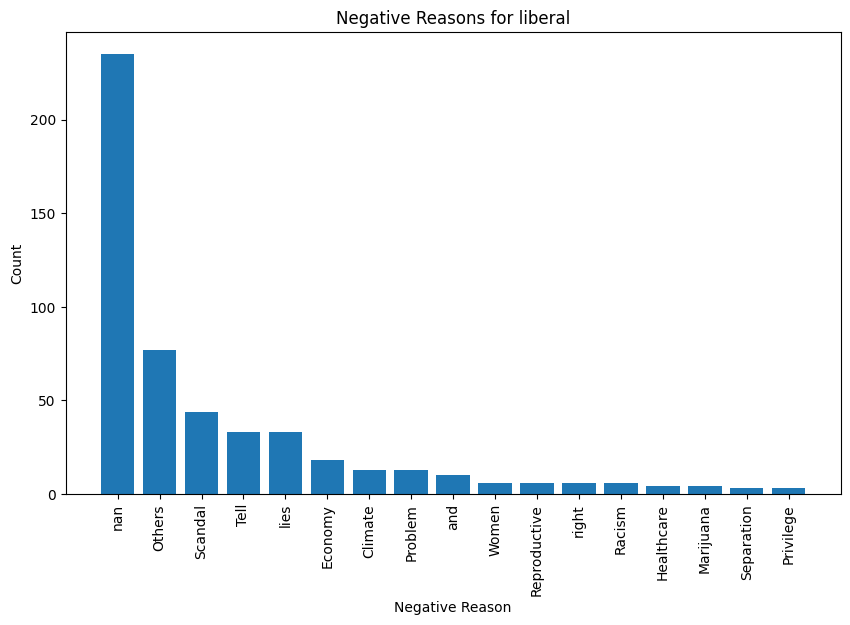

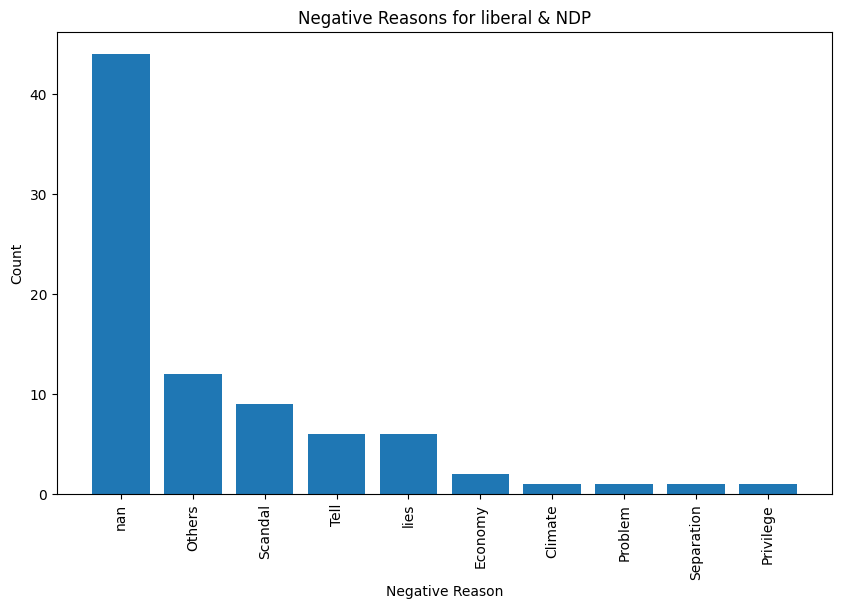

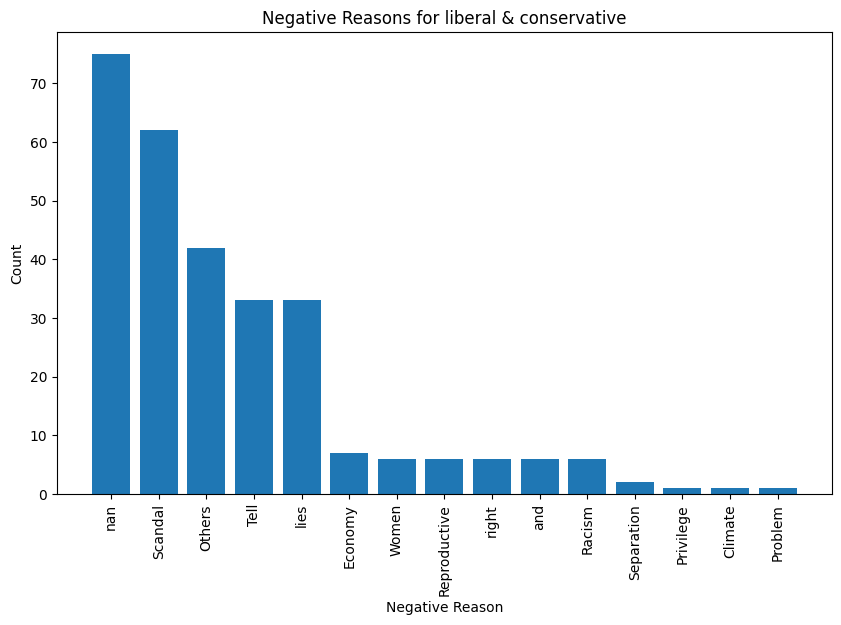

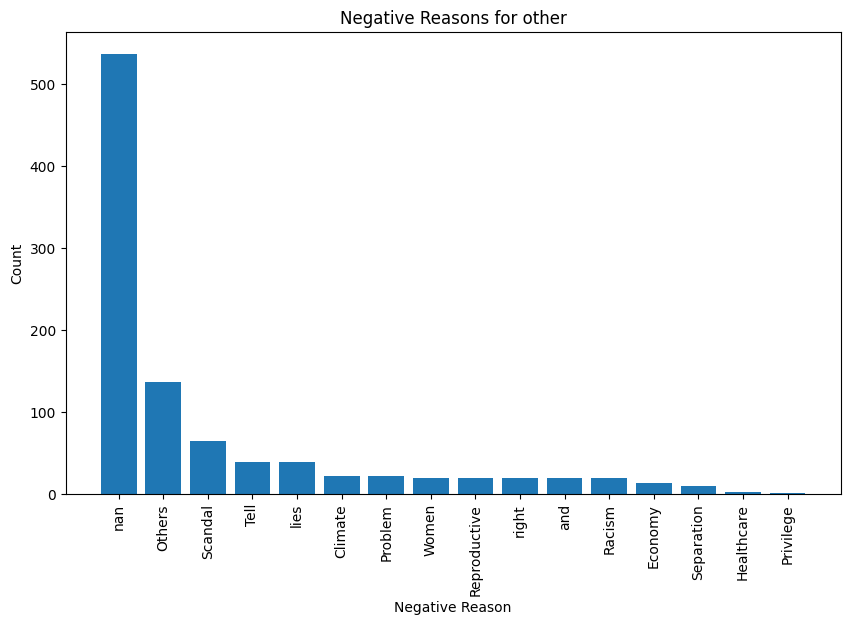

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 positive sentiments for each party
for party, sentiments in top_10_positive.groupby('party'):
    plt.figure(figsize=(10, 6))
    plt.bar(sentiments['sentiment_score'], sentiments['party'])
    plt.xlabel('Sentiment Score')
    plt.ylabel('Party')
    plt.title('Top 10 Positive Sentiments for {}'.format(party))
    plt.show()

# Plot the negative reasons for each party
for party, reasons in negative_reason_counts.items():
    plt.figure(figsize=(10, 6))
    reasons = dict(reasons)
    plt.bar(reasons.keys(), reasons.values())
    plt.xlabel('Negative Reason')
    plt.ylabel('Count')
    plt.title('Negative Reasons for {}'.format(party))
    plt.xticks(rotation=90)
    plt.show()


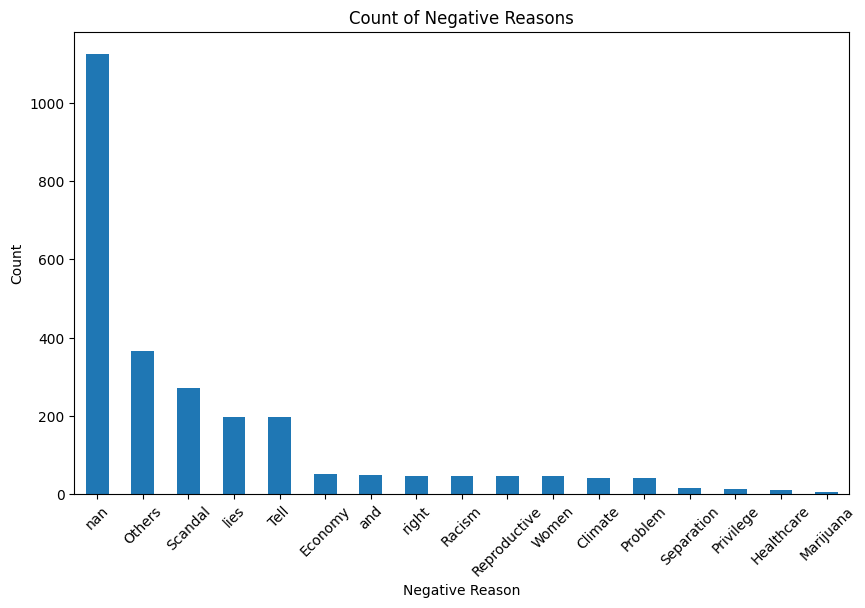

<Figure size 1000x600 with 0 Axes>

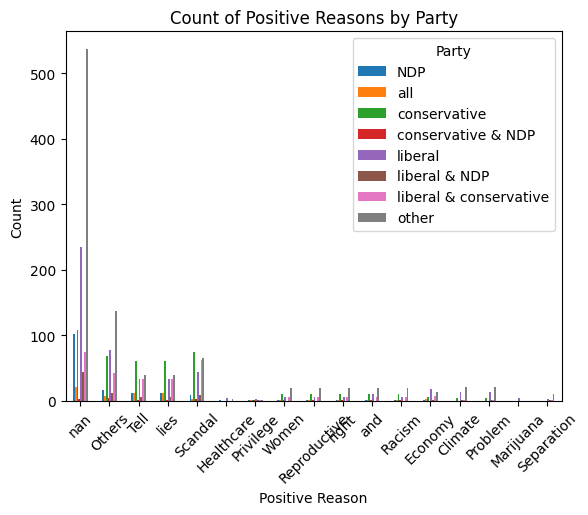

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows with NaN values in 'negative_reason' column
filtered_negative_reason = raw_elections.dropna(subset=['negative_reason'])

# Group the DataFrame by 'party' and aggregate the 'negative_reason' column
grouped_positive_reason = filtered_negative_reason.groupby('party')['negative_reason'].apply(lambda x: ' '.join(x))

# Count the occurrences of positive reasons for each party
positive_reason_counts = grouped_positive_reason.apply(lambda x: Counter(x.split()).most_common())

# Convert the counts to a DataFrame
positive_reason_counts_df = pd.DataFrame.from_dict({party: dict(reasons) for party, reasons in positive_reason_counts.items()}, orient='index')

# Transpose the DataFrame for better visualization
positive_reason_counts_df = positive_reason_counts_df.T

# Plot the count of positive reasons for each party
plt.figure(figsize=(10, 6))
positive_reason_counts_df.plot(kind='bar')
plt.title('Count of Positive Reasons by Party')
plt.xlabel('Positive Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()


<Figure size 1000x600 with 0 Axes>

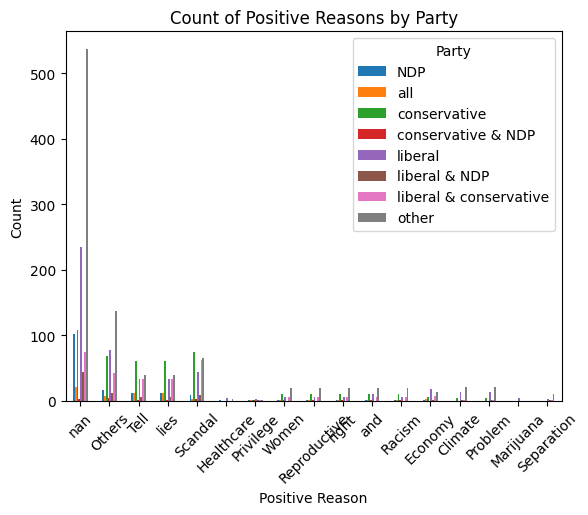

In [ ]:
import numpy as np

# Filter out rows with NaN values in 'negative_reason' column
filtered_negative_reason = raw_elections.dropna(subset=['negative_reason'])

# Group the DataFrame by 'party' and aggregate the 'negative_reason' column
grouped_positive_reason = filtered_negative_reason.groupby('party')['negative_reason'].apply(lambda x: ' '.join(x))

# Count the occurrences of positive reasons for each party
positive_reason_counts = grouped_positive_reason.apply(lambda x: Counter(x.split()).most_common())

# Convert the counts to a DataFrame
positive_reason_counts_df = pd.DataFrame.from_dict({party: dict(reasons) for party, reasons in positive_reason_counts.items()}, orient='index')

# Replace NaN values with an empty dictionary
positive_reason_counts_df = positive_reason_counts_df.replace(np.nan, {})
positive_reason_counts_df = positive_reason_counts_df.replace('nan', {})

# Transpose the DataFrame for better visualization
positive_reason_counts_df = positive_reason_counts_df.T

# Plot the count of positive reasons for each party
plt.figure(figsize=(10, 6))
positive_reason_counts_df.plot(kind='bar')
plt.title('Count of Positive Reasons by Party')
plt.xlabel('Positive Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
raw_elections

,negative_reason,text,new_text,label,party
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0,conservative
1,nan,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1,other
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0,liberal
3,nan,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1,other
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0,liberal
...,...,...,...,...,...
2128,Scandal,b'you know he was doing a good enough job smea...,know good job smear campaign right andrewsch c...,0,conservative
2129,Scandal,b'you missed the comment. deflecting the issue...,miss comment deflect issu answer best respons ...,0,liberal & conservative
2130,nan,b'your daily reminder:\n@thejagmeetsingh endor...,daili remind thejagmeetsingh endors strateg vo...,1,liberal & NDP
2131,Women Reproductive right and Racism,b'yup...not going to reopen the abortion debat...,yup go reopen abort debat elxn43 scheerli sche...,0,conservative


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
filtered_new_text = raw_elections.dropna(subset=['new_text'])


In [ ]:
grouped_new_text = filtered_new_text.groupby('party')['new_text'].apply(lambda x: ' '.join(x))


In [ ]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
positive_words = {}
negative_words = {}

for party, text in grouped_new_text.items():
    words = text.split()
    word_counts = Counter(words)
    positive_words[party] = dict(word_counts.most_common(50))
    negative_words[party] = dict(word_counts.most_common()[:-51:-1])


In [ ]:
# Print the top 10 positive and negative words for each party:

for party, words in positive_words.items():
    print("Top 10 Positive Words for", party)
    for word, count in words.items():
        print(word, ":", count)
    print()

for party, words in negative_words.items():
    print("Top 10 Negative Words for", party)
    for word, count in words.items():
        print(word, ":", count)
    print()


Top 10 Positive Words for NDP
elxn43 : 146
ndp : 86
cdnpoli : 60
thejagmeetsingh : 38
uprisingh : 34
vote : 29
day : 17
canada : 17
canadian : 16
cndpoli : 15
jagmeet : 15
like : 14
support : 14
bad : 14
elect : 13
help : 13
time : 12
singh : 12
initfory : 11
campaign : 11
candid : 10
monday : 10
parti : 10
peopl : 10
let : 9
work : 9
green : 9
leader : 8
democraci : 8
go : 7
need : 7
friend : 7
guy : 7
elxn2019 : 6
pay : 6
door : 6
think : 6
prime : 6
minist : 6
vancouv : 6
volunt : 6
respect : 6
singhsurg : 6
watch : 5
canvass : 5
ride : 5
govern : 5
head : 5
polit : 5
thing : 5

Top 10 Positive Words for all
elxn43 : 49
ndp : 29
cdnpoli : 24
andrewsch : 17
scheer : 17
cpc : 16
thejagmeetsingh : 15
justintrudeau : 15
trudeau : 14
canada : 14
vote : 14
lpc : 12
support : 10
liber : 9
cpc_hq : 9
lie : 8
campaign : 7
govern : 6
say : 6
conserv : 6
candid : 6
canadian : 5
cndpoli : 5
andrew : 5
minor : 5
elect : 5
peopl : 5
leader : 5
uprisingh : 5
peoplespca : 5
want : 4
live : 4
pm : 4

In [ ]:
for party, words in positive_words.items():
    print("Positive Word Cloud for", party)
    generate_wordcloud(' '.join(words.keys()))

for party, words in negative_words.items():
    print("Negative Word Cloud for", party)
    generate_wordcloud(' '.join(words.keys()))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
positive_words

{'NDP': {'elxn43': 146,
  'ndp': 86,
  'cdnpoli': 60,
  'thejagmeetsingh': 38,
  'uprisingh': 34,
  'vote': 29,
  'day': 17,
  'canada': 17,
  'canadian': 16,
  'cndpoli': 15,
  'jagmeet': 15,
  'like': 14,
  'support': 14,
  'bad': 14,
  'elect': 13,
  'help': 13,
  'time': 12,
  'singh': 12,
  'initfory': 11,
  'campaign': 11,
  'candid': 10,
  'monday': 10,
  'parti': 10,
  'peopl': 10,
  'let': 9,
  'work': 9,
  'green': 9,
  'leader': 8,
  'democraci': 8,
  'go': 7,
  'need': 7,
  'friend': 7,
  'guy': 7,
  'elxn2019': 6,
  'pay': 6,
  'door': 6,
  'think': 6,
  'prime': 6,
  'minist': 6,
  'vancouv': 6,
  'volunt': 6,
  'respect': 6,
  'singhsurg': 6,
  'watch': 5,
  'canvass': 5,
  'ride': 5,
  'govern': 5,
  'head': 5,
  'polit': 5,
  'thing': 5},
 'all': {'elxn43': 49,
  'ndp': 29,
  'cdnpoli': 24,
  'andrewsch': 17,
  'scheer': 17,
  'cpc': 16,
  'thejagmeetsingh': 15,
  'justintrudeau': 15,
  'trudeau': 14,
  'canada': 14,
  'vote': 14,
  'lpc': 12,
  'support': 10,
  'liber

In [ ]:
grouped_new_text.head(10)

party
NDP                       uprisingh definit look forward asian paramilit...
all                       northppc nateweber13 andrewsch thejagmeetsingh...
conservative              rosiebarton instead suggest agre canadian wome...
conservative & NDP        lie thejagmeetsingh morn said andrewsch suppor...
liberal                   brantford go cost billion year ask justin elxn...
liberal & NDP             cdnpoli elxn43 liber doubl promis nation debt ...
liberal & conservative    cpckinsellag let receipt pay warren kinsella s...
other                     allwomanspacewalk real space_st etobicokenorth...
Name: new_text, dtype: object

In [ ]:
raw_elections.head()

,negative_reason,text,new_text,label,party
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0,conservative
1,nan,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1,other
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0,liberal
3,nan,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1,other
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0,liberal


In [ ]:
import re
import pandas as pd

# Define a function to extract hashtags from a text
def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    #return ' '.join(hashtags)
    return hashtags

# Define a function to extract hashtags and tags from a text
def extract_tags(text):
    tags = re.findall(r'@(\w+)', text)
    return tags

# Apply the function to the 'text' column and create new columns 'hashtags' and 'tags'
raw_elections['hashtags'] = raw_elections['text'].apply(extract_hashtags)
raw_elections['tags'] = raw_elections['text'].apply(extract_tags)




In [ ]:
raw_elections.head()

,negative_reason,text,new_text,label,party,hashtags,tags
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0,conservative,"[canadian, women, andrewscheer, conservatives,...",[rosiebarton]
1,nan,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1,other,"[allwomanspacewalk, etobicokenorth, cityofto, ...",[space_station]
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0,liberal,"[brantford, elxn43, cdnpoli, canada]",[]
3,nan,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1,other,"[canada, canadaelection2019, canadavotes, elxn43]",[]
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0,liberal,"[canada, taxpayers, trudeaumustgo, canada, snc...","[snclavalin, sheila_copps]"


In [ ]:
# Get a list of all tags and hashtags from the 'tags' and 'hashtags' columns
tags_list = raw_elections['tags'].sum()
hashtags_list = raw_elections['hashtags'].sum()
tags_and_hashtags = tags_list + hashtags_list
tags_and_hashtags = list(set(tags_and_hashtags))  # Remove duplicates

# Function to remove tags and hashtags from a text
def remove_tags_and_hashtags(text):
    words = text.split()
    filtered_words = [word for word in words if word not in tags_and_hashtags]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

# Apply the function to create the 'cleaned_text' column
raw_elections['cleaned_text'] = raw_elections['new_text'].apply(remove_tags_and_hashtags)


In [ ]:
raw_elections.head()

,negative_reason,text,new_text,label,party,hashtags,tags,cleaned_text
0,Women Reproductive right and Racism,"b""@rosiebarton so instead of your suggestion, ...",rosiebarton instead suggest agre canadian wome...,0,conservative,"[canadian, women, andrewscheer, conservatives,...",[rosiebarton],instead suggest agre trust andrewsch conserv g...
1,nan,"b""#allwomanspacewalk it's real!\n@space_statio...",allwomanspacewalk real space_st etobicokenorth...,1,other,"[allwomanspacewalk, etobicokenorth, cityofto, ...",[space_station],space_st
2,Economy,"b""#brantford it's going to cost you $94 billio...",brantford go cost billion year ask justin elxn...,0,liberal,"[brantford, elxn43, cdnpoli, canada]",[],go cost billion year ask justin
3,nan,"b""#canada #canadaelection2019 #canadavotes \n#...",canada canadaelection2019 canadavot elxn43 dec...,1,other,"[canada, canadaelection2019, canadavotes, elxn43]",[],canadavot decid help
4,Economy,"b""#canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...,0,liberal,"[canada, taxpayers, trudeaumustgo, canada, snc...","[snclavalin, sheila_copps]",taxpay sick tire hard earn donat corpor welfar...


In [ ]:
raw_elections['cleaned_text'][4]

'taxpay sick tire hard earn donat corpor welfar bum need reason leav care sheila_copp snclavalinscand'

In [ ]:
from collections import Counter

# Create a list of all hashtags
all_hashtags = raw_elections['hashtags'].sum()

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Group the DataFrame by 'party' and extract the top 10 hashtags for each party
top_10_positive_hashtags = raw_elections.groupby('party')['hashtags'].apply(lambda x: Counter(x.sum()).most_common(10))
top_10_negative_hashtags = raw_elections.groupby('party')['hashtags'].apply(lambda x: Counter(x.sum()).most_common()[:-11:-1])

# Print the top 10 positive hashtags for each party
print("Top 10 Positive Hashtags for Each Party:")
print(top_10_positive_hashtags)

# Print the top 10 negative hashtags for each party
print("Top 10 Negative Hashtags for Each Party:")
print(top_10_negative_hashtags)

# Print the count of hashtags for each party
print("Hashtag Counts for Each Party:")
for party, counts in hashtag_counts.items():
    print(party, ":", counts)


Top 10 Positive Hashtags for Each Party:
party
NDP                       [(elxn43, 147), (cdnpoli, 60), (uprisingh, 34)...
all                       [(elxn43, 49), (cdnpoli, 24), (cpc, 12), (ndp,...
conservative              [(elxn43, 336), (cdnpoli, 207), (cpc, 47), (ki...
conservative & NDP        [(elxn43, 15), (cdnpoli, 7), (cndpoli, 3), (vo...
liberal                   [(elxn43, 437), (cdnpoli, 241), (chooseforward...
liberal & NDP             [(elxn43, 77), (cdnpoli, 39), (uprisingh, 10),...
liberal & conservative    [(elxn43, 229), (cdnpoli, 138), (chooseforward...
other                     [(elxn43, 848), (cdnpoli, 451), (abpoli, 32), ...
Name: hashtags, dtype: object
Top 10 Negative Hashtags for Each Party:
party
NDP                       [(iamwithjagmeet, 1), (firstnations, 1), (bern...
all                       [(canadaelection2019, 1), (liberalparty, 1), (...
conservative              [(andyloveswarren, 1), (mayormaynot, 1), (sche...
conservative & NDP        [(voteppc, 1),

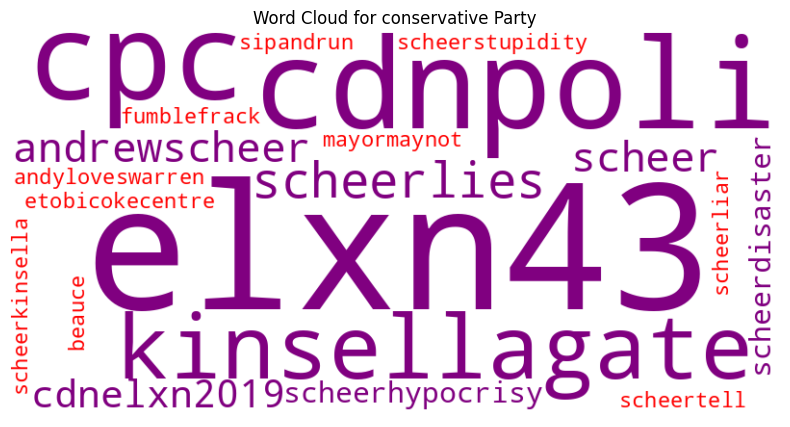

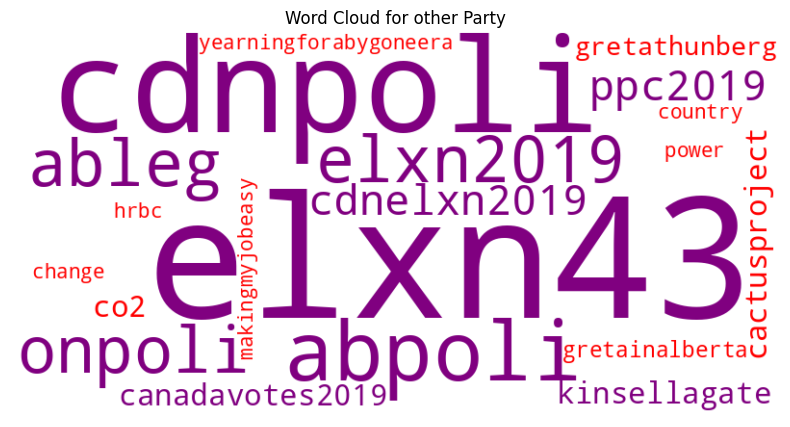

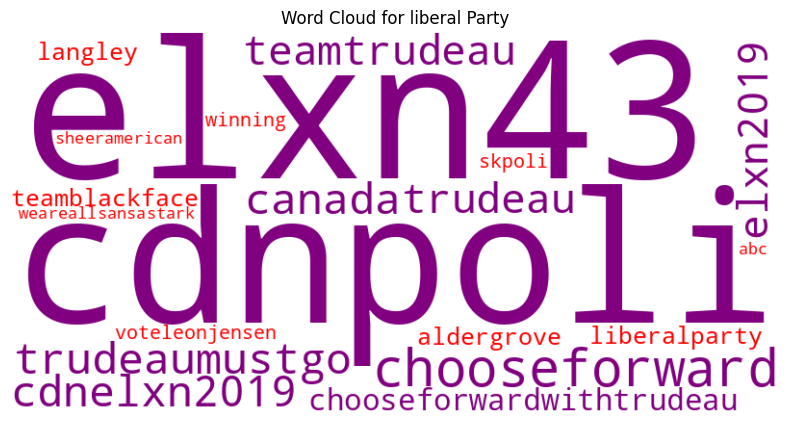

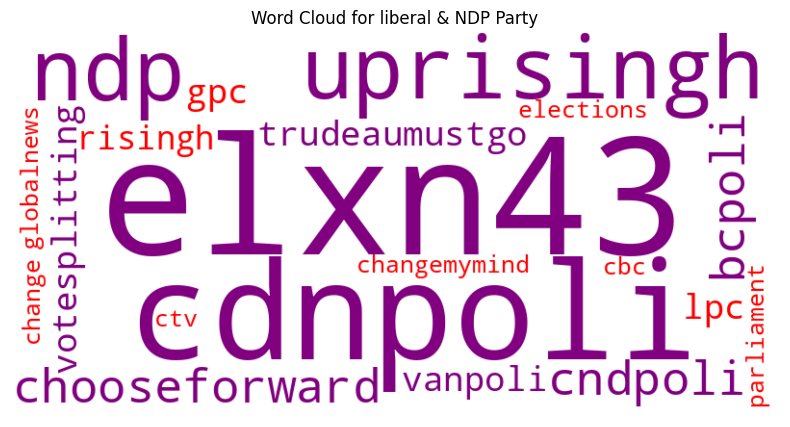

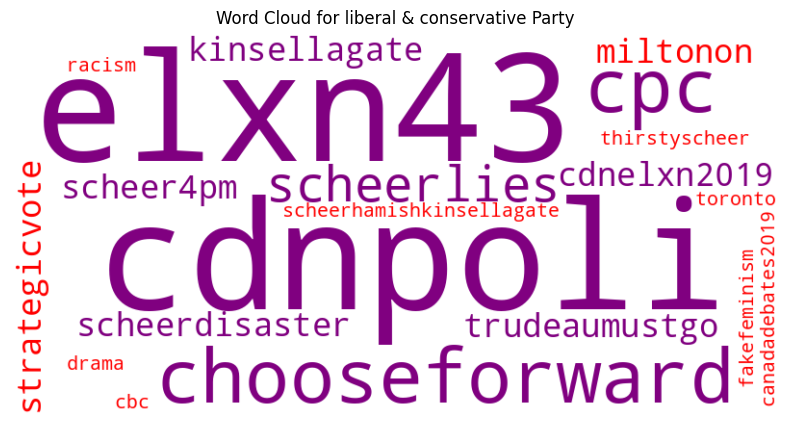

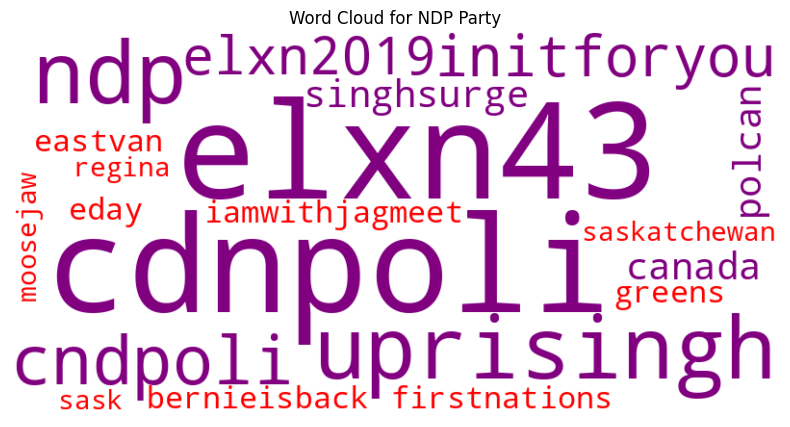

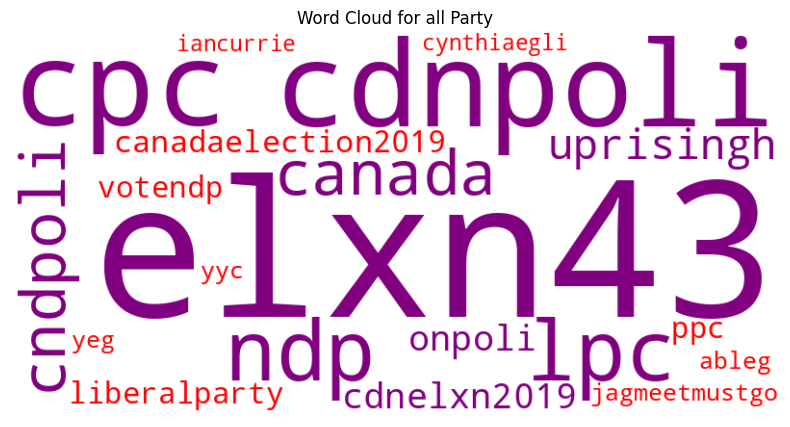

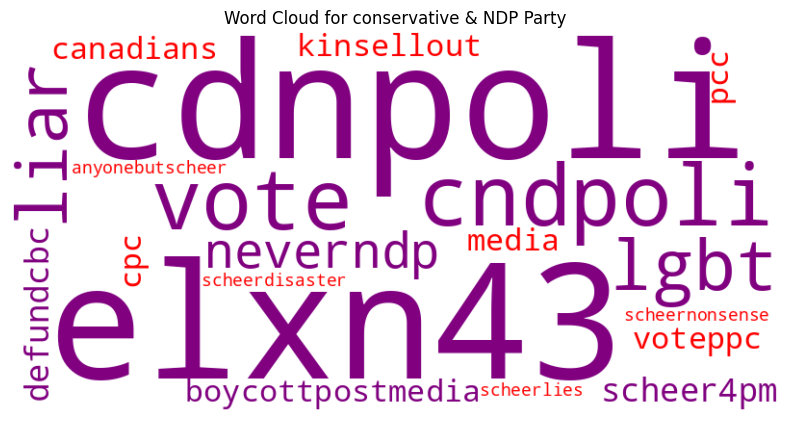

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the colors for positive and negative hashtags
positive_color = 'purple'
negative_color = 'red'

# Define the number of top hashtags to consider
num_top_hashtags = 10

# Iterate over each party
for party in raw_elections['party'].unique():
    # Get the top positive and negative hashtags for the party
    top_positive_hashtags = top_10_positive_hashtags[party][:num_top_hashtags]
    top_negative_hashtags = top_10_negative_hashtags[party][:num_top_hashtags]

    # Create separate lists for positive and negative hashtags
    positive_hashtags = [tag for tag, _ in top_positive_hashtags]
    negative_hashtags = [tag for tag, _ in top_negative_hashtags]

    # Combine positive and negative hashtags into a single list
    all_hashtags = positive_hashtags + negative_hashtags

    # Create a color function for the WordCloud
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in positive_hashtags:
            return positive_color
        elif word in negative_hashtags:
            return negative_color
        else:
            return 'black'

    # Create a WordCloud object with the specified color function
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func)

    # Generate word cloud for the party's hashtags
    wordcloud.generate_from_text(' '.join(all_hashtags))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {party} Party")
    plt.show()


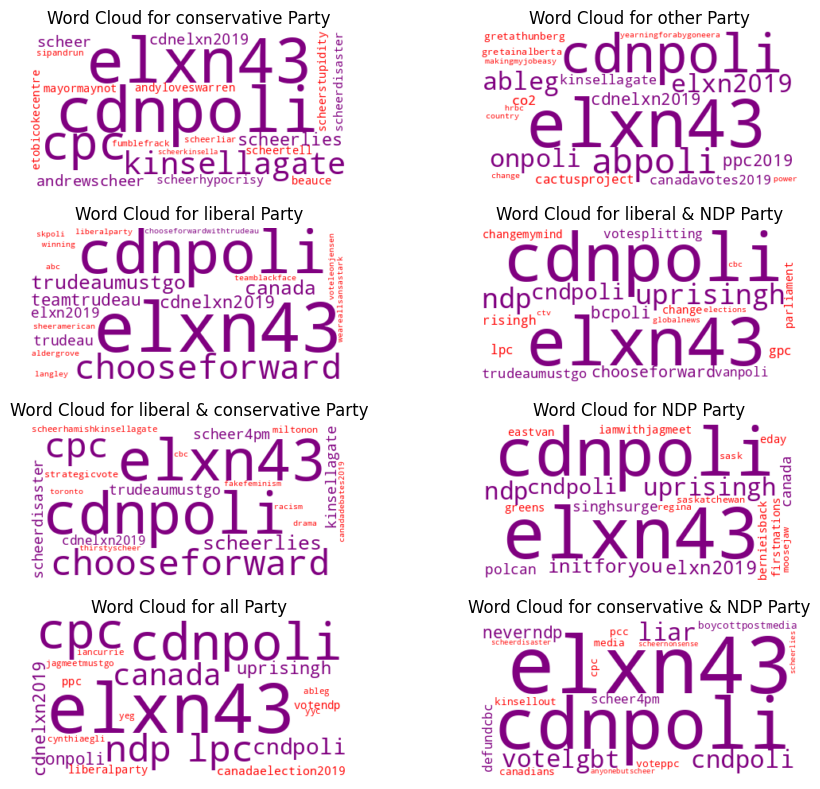

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the colors for positive and negative hashtags
positive_color = 'purple'
negative_color = 'red'

# Define the number of top hashtags to consider
num_top_hashtags = 10

# Get unique parties
parties = raw_elections['party'].unique()

# Determine the number of rows and columns in the grid layout
num_rows = int(len(parties) / 2) if len(parties) % 2 == 0 else int(len(parties) / 2) + 1
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each party and corresponding subplot
for i, (party, ax) in enumerate(zip(parties, axes)):
    # Get the top positive and negative hashtags for the party
    top_positive_hashtags = top_10_positive_hashtags[party][:num_top_hashtags]
    top_negative_hashtags = top_10_negative_hashtags[party][:num_top_hashtags]

    # Create separate lists for positive and negative hashtags
    positive_hashtags = [tag for tag, _ in top_positive_hashtags]
    negative_hashtags = [tag for tag, _ in top_negative_hashtags]

    # Combine positive and negative hashtags into a single list
    all_hashtags = positive_hashtags + negative_hashtags

    # Create a color function for the WordCloud
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in positive_hashtags:
            return positive_color
        elif word in negative_hashtags:
            return negative_color
        else:
            return 'black'

    # Create a WordCloud object with the specified color function
    wordcloud = WordCloud(width=400, height=200, background_color='white', color_func=color_func)

    # Generate word cloud for the party's hashtags
    wordcloud.generate_from_text(' '.join(all_hashtags))

    # Plot the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {party} Party")
    ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()

# Show the grid of word clouds
plt.show()


Top positive hashtags for conservative:
elxn43: 336
cdnpoli: 207
cpc: 47
kinsellagate: 25
scheerlies: 19
andrewscheer: 16
scheer: 14
cdnelxn2019: 13
scheerhypocrisy: 13
scheerdisaster: 13

Top negative hashtags for conservative:
andyloveswarren: 1
mayormaynot: 1
scheerstupidity: 1
beauce: 1
scheertell: 1
etobicokecentre: 1
fumblefrack: 1
sipandrun: 1
scheerliar: 1
scheerkinsella: 1
Top positive hashtags for other:
elxn43: 848
cdnpoli: 451
abpoli: 32
elxn2019: 23
ableg: 23
onpoli: 20
cdnelxn2019: 20
ppc2019: 19
kinsellagate: 16
canadavotes2019: 15

Top negative hashtags for other:
co2: 1
cactusproject: 1
gretathunberg: 1
gretainalberta: 1
yearningforabygoneera: 1
hrbc: 1
makingmyjobeasy: 1
country: 1
change: 1
power: 1
Top positive hashtags for liberal:
elxn43: 437
cdnpoli: 241
chooseforward: 116
trudeaumustgo: 51
canada: 22
cdnelxn2019: 15
teamtrudeau: 13
elxn2019: 12
trudeau: 10
chooseforwardwithtrudeau: 9

Top negative hashtags for liberal:
teamblackface: 1
liberalparty: 1
aldergrove

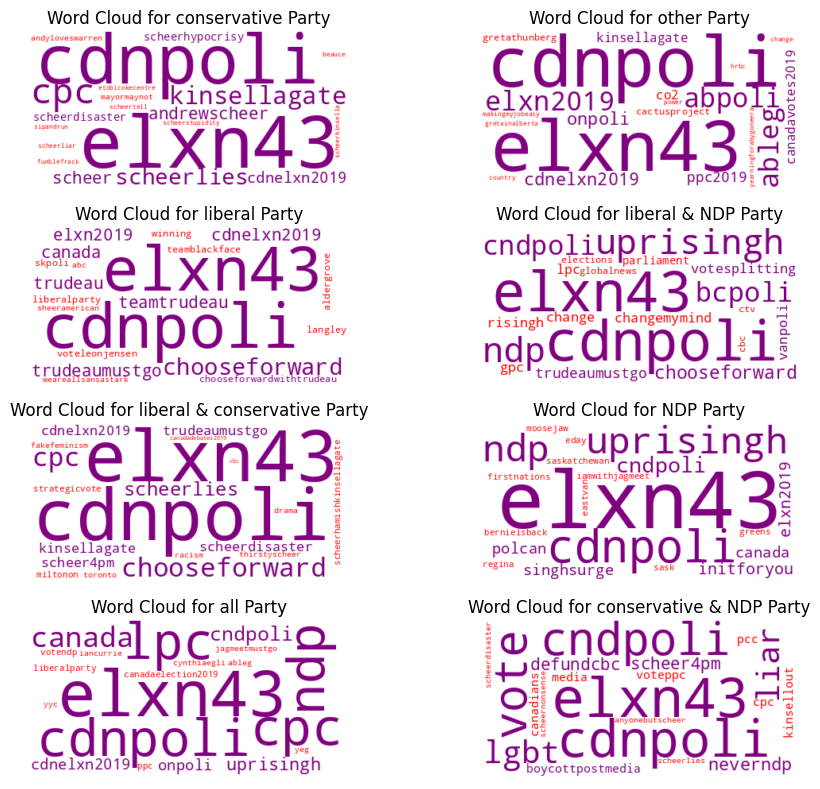

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the colors for positive and negative hashtags
positive_color = 'purple'
negative_color = 'red'

# Define the number of top hashtags to consider
num_top_hashtags = 10

# Get unique parties
parties = raw_elections['party'].unique()

# Determine the number of rows and columns in the grid layout
num_rows = int(len(parties) / 2) if len(parties) % 2 == 0 else int(len(parties) / 2) + 1
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each party and corresponding subplot
for i, (party, ax) in enumerate(zip(parties, axes)):
    # Get the top positive and negative hashtags for the party
    top_positive_hashtags = top_10_positive_hashtags[party][:num_top_hashtags]
    top_negative_hashtags = top_10_negative_hashtags[party][:num_top_hashtags]

    # Create separate lists for positive and negative hashtags
    positive_hashtags = [tag for tag, _ in top_positive_hashtags]
    negative_hashtags = [tag for tag, _ in top_negative_hashtags]

    # Combine positive and negative hashtags into a single list
    all_hashtags = positive_hashtags + negative_hashtags

    # Create a color function for the WordCloud
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in positive_hashtags:
            return positive_color
        elif word in negative_hashtags:
            return negative_color
        else:
            return 'black'

    # Create a WordCloud object with the specified color function
    wordcloud = WordCloud(width=400, height=200, background_color='white', color_func=color_func)

    # Generate word cloud for the party's hashtags
    wordcloud.generate_from_text(' '.join(all_hashtags))

    # Plot the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {party} Party")
    ax.axis('off')

    # Print the top positive and negative hashtags for the party
    print(f"Top positive hashtags for {party}:")
    for hashtag, count in top_positive_hashtags:
        print(f"{hashtag}: {count}")
    print(f"\nTop negative hashtags for {party}:")
    for hashtag, count in top_negative_hashtags:
        print(f"{hashtag}: {count}")

# Adjust spacing and layout
plt.tight_layout()

# Show the grid of word clouds
plt.show()
